<a href="https://colab.research.google.com/github/Shagun20/CSE508_Winter2023_A2_112/blob/main/IR_PartC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
#Load the MSLR dataset into a Pandas DataFrame.

import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/IR_AssnDatasets_Sem6/IR-assignment-2-data (2).txt'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
data = pd.read_csv(path, sep=' ', header=None)
data=data.iloc[: , :-1]


In [62]:
data = data.rename(columns={0: 'relevance', 1: 'qid'})
# Output: Index(['new_col1', 'new_col2'], dtype='object')


In [63]:
data

,relevance,qid,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239088,0,qid:29989,1:2,2:0,3:1,4:1,5:2,6:1,7:0,8:0.50000,...,127:49,128:9754,129:29,130:2889,131:63571,132:1,133:1,134:0,135:0,136:0
239089,0,qid:29989,1:2,2:0,3:1,4:0,5:2,6:1,7:0,8:0.50000,...,127:43,128:84,129:1,130:9450,131:19599,132:4,133:4,134:0,135:0,136:0
239090,1,qid:29989,1:2,2:0,3:2,4:2,5:2,6:1,7:0,8:1,...,127:44,128:1,129:0,130:144,131:6701,132:5,133:2,134:0,135:0,136:0
239091,1,qid:29989,1:2,2:0,3:2,4:0,5:2,6:1,7:0,8:1,...,127:76,128:0,129:11,130:2152,131:65535,132:37,133:16,134:0,135:0,136:0


In [64]:
df=data

In [65]:
df['qid'] = df['qid'].apply(lambda x: int(x.split(':')[1]))

In [66]:
df

,relevance,qid,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239088,0,29989,1:2,2:0,3:1,4:1,5:2,6:1,7:0,8:0.50000,...,127:49,128:9754,129:29,130:2889,131:63571,132:1,133:1,134:0,135:0,136:0
239089,0,29989,1:2,2:0,3:1,4:0,5:2,6:1,7:0,8:0.50000,...,127:43,128:84,129:1,130:9450,131:19599,132:4,133:4,134:0,135:0,136:0
239090,1,29989,1:2,2:0,3:2,4:2,5:2,6:1,7:0,8:1,...,127:44,128:1,129:0,130:144,131:6701,132:5,133:2,134:0,135:0,136:0
239091,1,29989,1:2,2:0,3:2,4:0,5:2,6:1,7:0,8:1,...,127:76,128:0,129:11,130:2152,131:65535,132:37,133:16,134:0,135:0,136:0


In [67]:
df = df[df['qid'] == 4]


In [68]:
df

,relevance,qid,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:62,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0
99,1,4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,127:52,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667
100,2,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:28,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361
101,1,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688


In [69]:
# Create a dictionary to store the relevance scores for each query-url pair.
#since each row represents a query-qid pair, we can directly store the relevance scores for each pair into a dict

#each key in dictionary represents a pair id of url and query
scores={}
for index, row in df.iterrows():
  scores[index]= row['relevance']



In [70]:
# Calculate the DCG scores for each query-url pair, using the relevance scores and the DCG formula
import numpy as np
def dg(relevance, i):
    # Formula for calculating DCG
    a= relevance / np.log2(i+1)
    return a

# Sort the query-url pairs by their DCG scores, in descending order.
# Write the sorted query-url pairs to a new file, in order of the maximum DCG.

In [71]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             93,  94,  95,  96,  97,  98,  99, 100, 101, 102],
           dtype='int64', length=103)

In [72]:
#find dg for all the pairs, assuming we are provided the pairs in order of their ranking only

dcg=[]
sum=0
for i in range(len(df.index)):
  sum+=dg(scores[i],i+1)
  dcg.append(sum)





In [73]:
dcg

[0.0,
 0.0,
 0.0,
 0.0,
 0.38685280723454163,
 0.38685280723454163,
 0.7201861405678749,
 1.666580770925061,
 1.666580770925061,
 1.666580770925061,
 1.945523716576191,
 1.945523716576191,
 1.945523716576191,
 2.2014817413860066,
 2.2014817413860066,
 2.2014817413860066,
 2.2014817413860066,
 2.436890654752645,
 2.899647081072163,
 3.354987578466069,
 3.5792314026836447,
 4.0213608615986525,
 4.457569445569716,
 4.457569445569716,
 4.670315499123079,
 5.0909353348373845,
 5.0909353348373845,
 5.0909353348373845,
 5.0909353348373845,
 5.292784421419484,
 5.292784421419484,
 5.292784421419484,
 5.489346053652307,
 5.489346053652307,
 5.8761988608868485,
 5.8761988608868485,
 6.257301685740395,
 6.635702404774135,
 6.823604229483243,
 6.823604229483243,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.19450

In [74]:
#append the found dcg value as column to the dataframe
df['dcg']=dcg

<ipython-input-74-663f96d49fce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dcg']=dcg


In [75]:
df

,relevance,qid,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,dcg
0,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,0.000000
1,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,0.000000
2,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,0.000000
3,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,0.000000
4,1,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,0.386853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,11.737998
99,1,4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,11.888188
100,2,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,12.187929
101,1,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,12.337484


In [76]:
#Now sorting the dataframe based on the column dcg, use sort_values function
sorted_by_dcg = df.sort_values(by='dcg', ascending=False)

In [77]:
sorted_by_dcg 

,relevance,qid,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,dcg
102,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:1415,129:14,130:5334,131:6434,132:4,133:17,134:0,135:0,136:0,12.337484
101,1,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,12.337484
100,2,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,12.187929
99,1,4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,11.888188
98,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,11.737998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,0.386853
2,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,0.000000
1,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,0.000000
3,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,0.000000


In [78]:
# saving the dataframe
sorted_by_dcg .to_csv('file1.csv')


In [79]:
#number of ways this sorting can be done is the number of same permutations of the dcg array

from collections import defaultdict
from math import factorial

def count(dcg):
  #number of ways is equal to product of factorial of number of like terms
  dict_={}
  for t in dcg:
    if t in dict_:
      dict_[t]+=1

    else:
      dict_[t]=1

  p=1
  
  for i in dict_:
    p=p*math.factorial(dict_[i])

  return(p)



In [80]:
import math
#number of ways files could be made 
print("Number of ways such files could be made : ", count(dcg))

Number of ways such files could be made :  12595179495187438268055552000


In [81]:
dcg_entire_dataset= dcg[len(dcg)-1]

dcg_50=dcg[49]

In [82]:
dcg_50

7.1945022763139805

In [83]:
 #dcg_entire= 12.337484420604603
 #dcg_50= 7.1945022763139805



In [84]:
#Calculate the ideal dcg for the dataset by sorting based on the relevance scores
sorted_by_rel = df.sort_values(by='relevance', ascending=False)

ideal_dcg=0
ideal_dcg_50=0
cnt=0

for index, row in sorted_by_rel.iterrows():
   ideal_dcg+=dg(row['relevance'],cnt+1)
   cnt+=1
  



In [85]:
ideal_dcg

19.407247618668023

In [86]:
#Perform the same steps but for ndcg at pos 50
df_50= df.head(50)

#Calculate the ideal dcg for the top 50 rows in dataset by sorting based on the relevance scores
sorted_by_rel_50 = df_50.sort_values(by='relevance', ascending=False)

ideal_dcg_50=0
cnt=0

for index, row in sorted_by_rel_50.iterrows():
   ideal_dcg_50+=dg(row['relevance'],cnt+1)
   cnt+=1



In [87]:
ideal_dcg_50

12.58382772001186

In [88]:
print("NDCG for entire dataset is ", dcg_entire_dataset/ideal_dcg)
print("NDCG at pos 50 is ", dcg_50/ideal_dcg_50)


NDCG for entire dataset is  0.6357153091990775
NDCG at pos 50 is  0.5717260627203818


In [89]:
# For the third objective, assume a model that ranks URLs based on the value of feature 75,
# which represents the sum of TF-IDF on the whole document.

#URLs with higher feature 75 values are considered more relevant.


In [90]:
#col 76 corr to feature 75
df[76] = df[76].apply(lambda x: float(x.split(':')[1]))

<ipython-input-90-eb218b2ab3c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[76] = df[76].apply(lambda x: float(x.split(':')[1]))


In [91]:
df[76]

0       90.531710
1      538.388954
2       88.171761
3      144.564444
4      142.589323
          ...    
98      70.460443
99     270.132330
100    296.023694
101    528.520116
102     84.625987
Name: 76, Length: 103, dtype: float64

In [92]:
df_sorted_by_75 = df.sort_values(by=76, ascending=False)

In [93]:
#now the new dataframe ranks urls based on their feature 75 values
df_sorted_by_75[76]

8      972.826451
67     612.893205
56     571.500533
1      538.388954
101    528.520116
          ...    
94      15.773388
16      14.972391
86      14.972391
49       3.539923
81       3.539923
Name: 76, Length: 103, dtype: float64

In [94]:
precision_at_k=[]
recall_at_k=[]

no_of_rel=0
total=0
#finding precision at k 

for index, row in df_sorted_by_75.iterrows():
  total+=1

  if row['relevance']!=0:
    no_of_rel+=1

  precision_at_k.append(no_of_rel/total)

  

  



In [95]:
precision_at_k

[0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.16666666666666666,
 0.2857142857142857,
 0.375,
 0.3333333333333333,
 0.4,
 0.36363636363636365,
 0.4166666666666667,
 0.46153846153846156,
 0.5,
 0.5333333333333333,
 0.5625,
 0.5294117647058824,
 0.5555555555555556,
 0.5263157894736842,
 0.55,
 0.5238095238095238,
 0.5,
 0.5217391304347826,
 0.5416666666666666,
 0.56,
 0.5769230769230769,
 0.5555555555555556,
 0.5357142857142857,
 0.5172413793103449,
 0.5,
 0.4838709677419355,
 0.5,
 0.48484848484848486,
 0.5,
 0.4857142857142857,
 0.4722222222222222,
 0.4864864864864865,
 0.5,
 0.48717948717948717,
 0.5,
 0.5121951219512195,
 0.5238095238095238,
 0.5116279069767442,
 0.5,
 0.4888888888888889,
 0.4782608695652174,
 0.48936170212765956,
 0.4791666666666667,
 0.46938775510204084,
 0.48,
 0.49019607843137253,
 0.5,
 0.49056603773584906,
 0.5,
 0.509090909090909,
 0.5,
 0.5087719298245614,
 0.5172413793103449,
 0.5084745762711864,
 0.5166666666666667,
 0.5081967213114754,
 0.5,
 0.5079365079365079,
 0.5,


In [96]:
total_rel= no_of_rel
total_rel

44

In [97]:
#for recal, we see how many of the total rel are retrieved by now
found=0
for index, row in df_sorted_by_75.iterrows():

  if row['relevance']!=0:
    found+=1

  recall_at_k.append(found/total_rel)



In [98]:
recall_at_k

[0.0,
 0.0,
 0.0,
 0.0,
 0.022727272727272728,
 0.022727272727272728,
 0.045454545454545456,
 0.06818181818181818,
 0.06818181818181818,
 0.09090909090909091,
 0.09090909090909091,
 0.11363636363636363,
 0.13636363636363635,
 0.1590909090909091,
 0.18181818181818182,
 0.20454545454545456,
 0.20454545454545456,
 0.22727272727272727,
 0.22727272727272727,
 0.25,
 0.25,
 0.25,
 0.2727272727272727,
 0.29545454545454547,
 0.3181818181818182,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.36363636363636365,
 0.36363636363636365,
 0.38636363636363635,
 0.38636363636363635,
 0.38636363636363635,
 0.4090909090909091,
 0.4318181818181818,
 0.4318181818181818,
 0.45454545454545453,
 0.4772727272727273,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5227272727272727,
 0.5227272727272727,
 0.5227272727272727,
 0.5454545454545454,
 0.5681818181818182,
 0.5909090909090909,
 0.5909090909090909,
 0.6136363636363636,
 0.6363636363636364

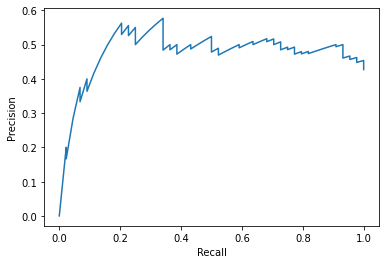

In [99]:
#plot between precision and recall,
#precision on y axis, recall at x

import matplotlib.pyplot as plt

plt.plot(recall_at_k, precision_at_k)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

